In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.dates as mdates

In [2]:
os.path.exists("backtest_result")
save_path = 'figure/' 
if not os.path.exists(save_path):
    os.makedirs(save_path)

import matplotlib
a = sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
plt.rcParams["font.family"] = 'STIXGeneral'

In [3]:
model_list = ['A2C', 'PPO', 'SAC','DDPG','CWMR','OLMAR','RMR','QFPIS']
market_list = ['forex_data','China_stock','US_stock']
QPL = ['QPL_1','QPL_2','QPL_3','QPL_4']

In [4]:
# 读取CSV文件
data = pd.read_csv('forex_data/D_GBPUSD.csv')

# 对数据进行倒序排列
data = data.iloc[::-1].reset_index(drop=True)

# 计算需要提取的数据行数
num_rows_to_extract = int(len(data) * 0.1)

# 提取后20%的日期
last_20_percent_dates = data['Date'].tail(num_rows_to_extract)
# 输出提取的日期
print(last_20_percent_dates[:-4])

3940    2021-08-11 00:00:00+01:00
3941    2021-08-12 00:00:00+01:00
3942    2021-08-13 00:00:00+01:00
3943    2021-08-16 00:00:00+01:00
3944    2021-08-17 00:00:00+01:00
                  ...            
4368    2023-04-03 00:00:00+01:00
4369    2023-04-04 00:00:00+01:00
4370    2023-04-05 00:00:00+01:00
4371    2023-04-06 00:00:00+01:00
4372    2023-04-07 00:00:00+01:00
Name: Date, Length: 433, dtype: object


In [5]:
# res_df = pd.read_csv(f'backtest_result/{model_list[0]}_{market_list[0]}_results.csv')
# CR = res_df.loc[res_df['metric'] == 'CR', 'value'].values
# CR = CR[0].replace('\n', '').strip('[]')
# floats = [float(x) for x in CR.split()]
# cr_arr = np.array(floats, dtype=float)

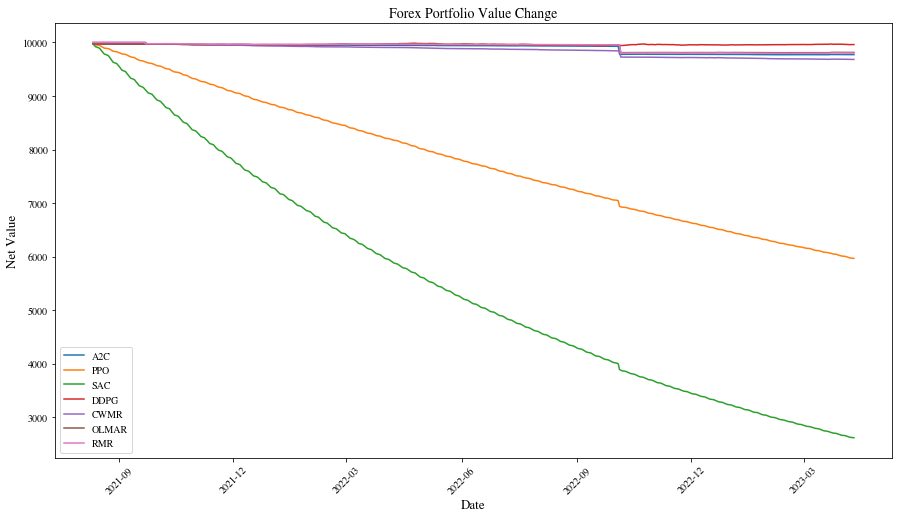

In [6]:
# 设置图形大小
plt.figure(figsize=(15, 8))

for i in range(len(model_list)-1):
    
    # if i == len(model_list)-1:
    #     res_df = pd.read_csv(f'backtest_result/{model_list[i]}_{QPL[3]}_{market_list[0]}_results.csv')
    # else:
    res_df = pd.read_csv(f'backtest_result/{model_list[i]}_{market_list[0]}_results.csv')
    CR = res_df.loc[res_df['metric'] == 'CR', 'value'].values
    CR = CR[0].replace('\n', '').strip('[]')
    floats = [float(x) for x in CR.split()]
    cr_arr = np.array(floats, dtype=float)

    # 创建一个新的DataFrame，包含日期和净值序列
    data = pd.DataFrame({'Date': last_20_percent_dates[:-3], 'Net_Value': cr_arr})

    # 将日期列转换为datetime类型
    data['Date'] = pd.to_datetime(data['Date'])

    # 绘制净值序列图
    plt.plot(data['Date'], data['Net_Value'], label=model_list[i])  # 添加标签

# 设置x轴的日期格式和间隔
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# 旋转x轴标签
plt.xticks(rotation=45)

# 设置x轴和y轴的标签
plt.xlabel('Date',fontsize=13)
plt.ylabel('Net Value',fontsize=13)

# 设置图表标题
plt.title('Forex Portfolio Value Change',fontsize=14)

# 添加图例
plt.legend()
# 显示图形
figure_name = "forex_backtest_baseline.png"
plt.savefig(os.path.join(save_path, figure_name),dpi=400,bbox_inches = 'tight')
plt.show()



(434,)
(434,)
(434,)
(434,)


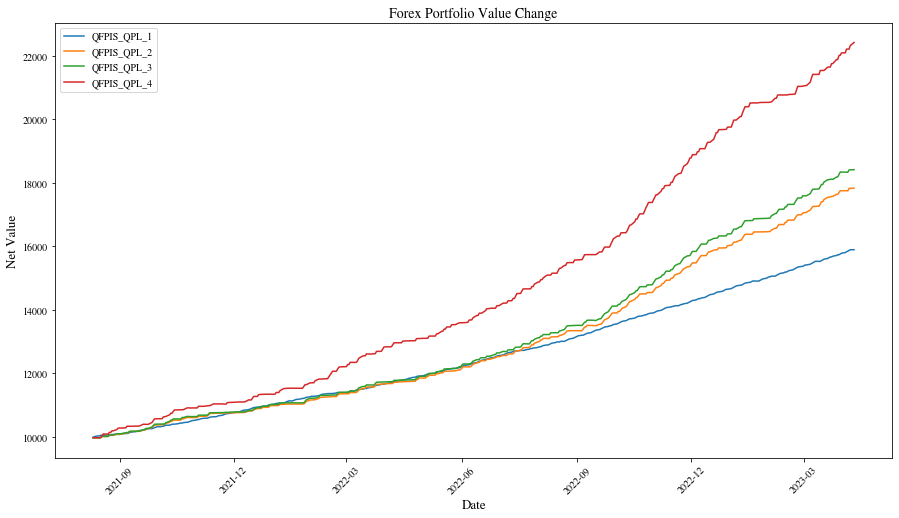

In [7]:
# 设置图形大小
plt.figure(figsize=(15, 8))

for i in range(len(QPL)):
    
    
    res_df = pd.read_csv(f'backtest_result/{model_list[-1]}_{QPL[i]}_{market_list[0]}_results.csv')
    CR = res_df.loc[res_df['metric'] == 'CR', 'value'].values
    CR = CR[0].replace('\n', '').strip('[]')
    floats = [float(x) for x in CR.split()]
    cr_arr = np.array(floats, dtype=float)
    print(cr_arr.shape)

    # 创建一个新的DataFrame，包含日期和净值序列
    data = pd.DataFrame({'Date': last_20_percent_dates[:-3], 'Net_Value': cr_arr})

    # 将日期列转换为datetime类型
    data['Date'] = pd.to_datetime(data['Date'])

    # 绘制净值序列图
    plt.plot(data['Date'], data['Net_Value'], label=f"{model_list[-1]}_{QPL[i]}")  # 添加标签

# 设置x轴的日期格式和间隔
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# 旋转x轴标签
plt.xticks(rotation=45)

# 设置x轴和y轴的标签
plt.xlabel('Date',fontsize=13)
plt.ylabel('Net Value',fontsize=13)

# 设置图表标题
plt.title('Forex Portfolio Value Change',fontsize=14)

# 添加图例
plt.legend()
# 显示图形
figure_name = "forex_backtest_QFPIS.png"
plt.savefig(os.path.join(save_path, figure_name),dpi=400,bbox_inches = 'tight')
plt.show()

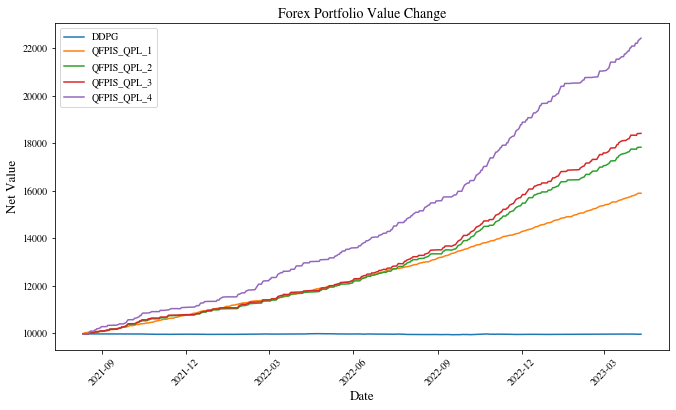

In [8]:
model_list = ['DDPG','QFPIS']

# 设置图形大小
plt.figure(figsize=(11, 6))

for i in range(len(model_list)):
    
    if i == len(model_list)-1:
        for j in range(len(QPL)):
            res_df = pd.read_csv(f'backtest_result/{model_list[i]}_{QPL[j]}_{market_list[0]}_results.csv')
            CR = res_df.loc[res_df['metric'] == 'CR', 'value'].values
            CR = CR[0].replace('\n', '').strip('[]')
            floats = [float(x) for x in CR.split()]
            cr_arr = np.array(floats, dtype=float)

            # 创建一个新的DataFrame，包含日期和净值序列
            data = pd.DataFrame({'Date': last_20_percent_dates[:-3], 'Net_Value': cr_arr})

            # 将日期列转换为datetime类型
            data['Date'] = pd.to_datetime(data['Date'])

            # 绘制净值序列图
            plt.plot(data['Date'], data['Net_Value'], label=f"{model_list[-1]}_{QPL[j]}")  # 添加标签
    else:
        res_df = pd.read_csv(f'backtest_result/{model_list[i]}_{market_list[0]}_results.csv')
        CR = res_df.loc[res_df['metric'] == 'CR', 'value'].values
        CR = CR[0].replace('\n', '').strip('[]')
        floats = [float(x) for x in CR.split()]
        cr_arr = np.array(floats, dtype=float)

        # 创建一个新的DataFrame，包含日期和净值序列
        data = pd.DataFrame({'Date': last_20_percent_dates[:-3], 'Net_Value': cr_arr})

        # 将日期列转换为datetime类型
        data['Date'] = pd.to_datetime(data['Date'])

        # 绘制净值序列图
        plt.plot(data['Date'], data['Net_Value'], label=model_list[i])  # 添加标签

# 设置x轴的日期格式和间隔
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# 旋转x轴标签
plt.xticks(rotation=45)

# 设置x轴和y轴的标签
plt.xlabel('Date',fontsize=13)
plt.ylabel('Net Value',fontsize=13)

# 设置图表标题
plt.title('Forex Portfolio Value Change',fontsize=14)

# 添加图例
plt.legend()
# 显示图形
figure_name = "forex_backtest_all.png"
plt.savefig(os.path.join(save_path, figure_name),dpi=400,bbox_inches = 'tight')
plt.show()

In [9]:
model_list = ['A2C', 'PPO', 'SAC','DDPG','CWMR','OLMAR','RMR','QFPIS']

# 读取CSV文件
data = pd.read_csv('China_stock/D_000002.SZ.csv')

# 对数据进行倒序排列
data = data.iloc[::-1].reset_index(drop=True)

# 计算需要提取的数据行数
num_rows_to_extract = int(len(data) * 0.1)

# 提取后20%的日期
last_20_percent_dates = data['trade_date'].tail(num_rows_to_extract)
# 将日期格式从"20200615"转换为"2019-12-06"
last_20_percent_dates = pd.to_datetime(last_20_percent_dates, format='%Y%m%d').dt.strftime('%Y-%m-%d')
# 输出提取的日期
print(last_20_percent_dates)

3116    2021-11-17
3117    2021-11-18
3118    2021-11-19
3119    2021-11-22
3120    2021-11-23
           ...    
3457    2023-04-13
3458    2023-04-14
3459    2023-04-17
3460    2023-04-18
3461    2023-04-19
Name: trade_date, Length: 346, dtype: object


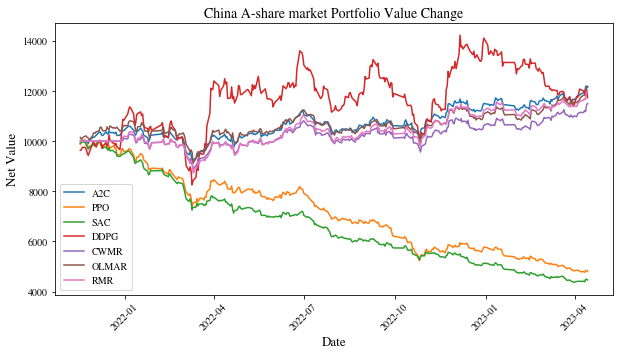

In [10]:
# 设置图形大小
plt.figure(figsize=(10, 5))

for i in range(len(model_list)-1):
    
    # if i == len(model_list)-1:
    #     res_df = pd.read_csv(f'backtest_result/{model_list[i]}_{QPL[3]}_{market_list[0]}_results.csv')
    # else:
    res_df = pd.read_csv(f'backtest_result/{model_list[i]}_{market_list[1]}_results.csv')
    CR = res_df.loc[res_df['metric'] == 'CR', 'value'].values
    CR = CR[0].replace('\n', '').strip('[]')
    floats = [float(x) for x in CR.split()]
    cr_arr = np.array(floats, dtype=float)

    # 创建一个新的DataFrame，包含日期和净值序列
    data = pd.DataFrame({'Date': last_20_percent_dates[:-3], 'Net_Value': cr_arr})

    # 将日期列转换为datetime类型
    data['Date'] = pd.to_datetime(data['Date'])

    # 绘制净值序列图
    plt.plot(data['Date'], data['Net_Value'], label=model_list[i])  # 添加标签

# 设置x轴的日期格式和间隔
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# 旋转x轴标签
plt.xticks(rotation=45)

# 设置x轴和y轴的标签
plt.xlabel('Date',fontsize=13)
plt.ylabel('Net Value',fontsize=13)

# 设置图表标题
plt.title('China A-share market Portfolio Value Change',fontsize=14)

# 添加图例
plt.legend()
# 显示图形
figure_name = "china_stock_backtest.png"
plt.savefig(os.path.join(save_path, figure_name),dpi=400,bbox_inches = 'tight')
plt.show()



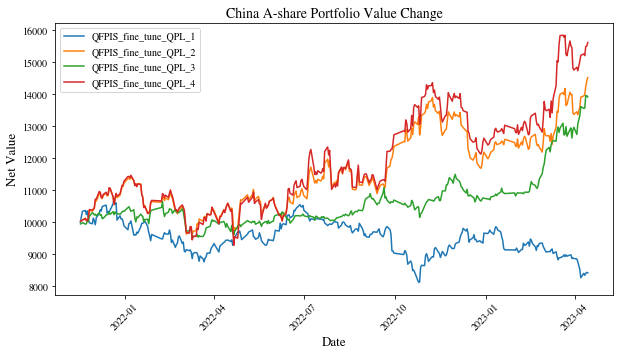

In [11]:
model_list = ['A2C','DDPG','CWMR','OLMAR','RMR','QFPIS_fine_tune']
# 设置图形大小
plt.figure(figsize=(10, 5))

for i in range(len(QPL)):
    
    
    res_df = pd.read_csv(f'backtest_result/{model_list[-1]}_{QPL[i]}_{market_list[1]}_results.csv')
    CR = res_df.loc[res_df['metric'] == 'CR', 'value'].values
    CR = CR[0].replace('\n', '').strip('[]')
    floats = [float(x) for x in CR.split()]
    cr_arr = np.array(floats, dtype=float)

    # 创建一个新的DataFrame，包含日期和净值序列
    data = pd.DataFrame({'Date': last_20_percent_dates[:-3], 'Net_Value': cr_arr})

    # 将日期列转换为datetime类型
    data['Date'] = pd.to_datetime(data['Date'])

    # 绘制净值序列图
    plt.plot(data['Date'], data['Net_Value'], label=f"{model_list[-1]}_{QPL[i]}")  # 添加标签

# 设置x轴的日期格式和间隔
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# 旋转x轴标签
plt.xticks(rotation=45)

# 设置x轴和y轴的标签
plt.xlabel('Date',fontsize=13)
plt.ylabel('Net Value',fontsize=13)

# 设置图表标题
plt.title('China A-share Portfolio Value Change',fontsize=14)

# 添加图例
plt.legend()
# 显示图形
figure_name = "china_stock_backtest_QFPIS.png"
plt.savefig(os.path.join(save_path, figure_name),dpi=400,bbox_inches = 'tight')
plt.show()

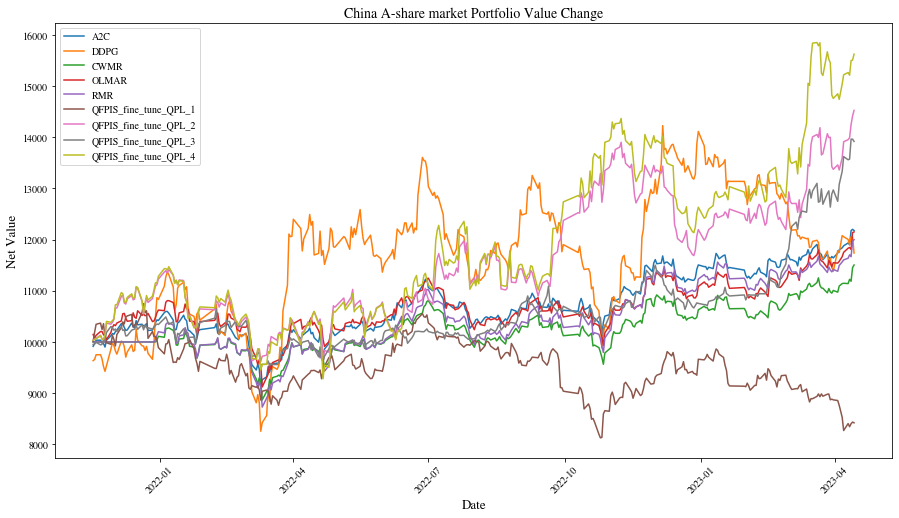

In [12]:
model_list = ['A2C','DDPG','CWMR','OLMAR','RMR','QFPIS_fine_tune']
# 设置图形大小
plt.figure(figsize=(15, 8))

for i in range(len(model_list)):
    
    if i == len(model_list)-1:
        for j in range(len(QPL)):
            res_df = pd.read_csv(f'backtest_result/{model_list[i]}_{QPL[j]}_{market_list[1]}_results.csv')
            CR = res_df.loc[res_df['metric'] == 'CR', 'value'].values
            CR = CR[0].replace('\n', '').strip('[]')
            floats = [float(x) for x in CR.split()]
            cr_arr = np.array(floats, dtype=float)

            # 创建一个新的DataFrame，包含日期和净值序列
            data = pd.DataFrame({'Date': last_20_percent_dates[:-3], 'Net_Value': cr_arr})

            # 将日期列转换为datetime类型
            data['Date'] = pd.to_datetime(data['Date'])

            # 绘制净值序列图
            plt.plot(data['Date'], data['Net_Value'], label=f"{model_list[-1]}_{QPL[j]}")  # 添加标签
    else:
        res_df = pd.read_csv(f'backtest_result/{model_list[i]}_{market_list[1]}_results.csv')
        CR = res_df.loc[res_df['metric'] == 'CR', 'value'].values
        CR = CR[0].replace('\n', '').strip('[]')
        floats = [float(x) for x in CR.split()]
        cr_arr = np.array(floats, dtype=float)

        # 创建一个新的DataFrame，包含日期和净值序列
        data = pd.DataFrame({'Date': last_20_percent_dates[:-3], 'Net_Value': cr_arr})

        # 将日期列转换为datetime类型
        data['Date'] = pd.to_datetime(data['Date'])

        # 绘制净值序列图
        plt.plot(data['Date'], data['Net_Value'], label=model_list[i])  # 添加标签

# 设置x轴的日期格式和间隔
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# 旋转x轴标签
plt.xticks(rotation=45)

# 设置x轴和y轴的标签
plt.xlabel('Date',fontsize=13)
plt.ylabel('Net Value',fontsize=13)

# 设置图表标题
plt.title('China A-share market Portfolio Value Change',fontsize=14)

# 添加图例
plt.legend()
# 显示图形
figure_name = "china_stock_backtest_all.png"
plt.savefig(os.path.join(save_path, figure_name),dpi=400,bbox_inches = 'tight')
plt.show()

In [13]:
model_list = ['A2C', 'PPO', 'SAC','DDPG','CWMR','OLMAR','RMR','QFPIS']
market_list = ['forex_data','China_stock','US_stock']
QPL = ['QPL_1','QPL_2','QPL_3','QPL_4']
# 读取CSV文件
data = pd.read_csv('US_stock/D_AAPL.csv')

# 对数据进行倒序排列
data = data.iloc[::-1].reset_index(drop=True)

# 计算需要提取的数据行数
num_rows_to_extract = int(len(data) * 0.1)

# 提取后20%的日期
last_20_percent_dates = data['Date'].tail(num_rows_to_extract)

# 输出提取的日期
print(last_20_percent_dates)

3415    2021-10-11 00:00:00-04:00
3416    2021-10-12 00:00:00-04:00
3417    2021-10-13 00:00:00-04:00
3418    2021-10-14 00:00:00-04:00
3419    2021-10-15 00:00:00-04:00
                  ...            
3789    2023-04-06 00:00:00-04:00
3790    2023-04-10 00:00:00-04:00
3791    2023-04-11 00:00:00-04:00
3792    2023-04-12 00:00:00-04:00
3793    2023-04-13 00:00:00-04:00
Name: Date, Length: 379, dtype: object


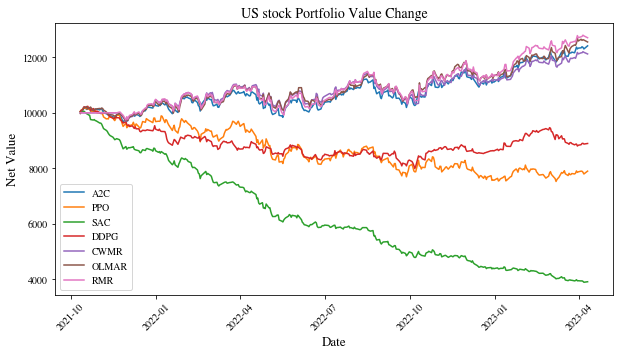

In [14]:
# 设置图形大小
plt.figure(figsize=(10, 5))

for i in range(len(model_list)-1):
    
    # if i == len(model_list)-1:
    #     res_df = pd.read_csv(f'backtest_result/{model_list[i]}_{QPL[3]}_{market_list[0]}_results.csv')
    # else:
    res_df = pd.read_csv(f'backtest_result/{model_list[i]}_{market_list[2]}_results.csv')
    CR = res_df.loc[res_df['metric'] == 'CR', 'value'].values
    CR = CR[0].replace('\n', '').strip('[]')
    floats = [float(x) for x in CR.split()]
    cr_arr = np.array(floats, dtype=float)

    # 创建一个新的DataFrame，包含日期和净值序列
    data = pd.DataFrame({'Date': last_20_percent_dates[:-3], 'Net_Value': cr_arr})

    # 将日期列转换为datetime类型
    data['Date'] = pd.to_datetime(data['Date'])

    # 绘制净值序列图
    plt.plot(data['Date'], data['Net_Value'], label=model_list[i])  # 添加标签

# 设置x轴的日期格式和间隔
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# 旋转x轴标签
plt.xticks(rotation=45)

# 设置x轴和y轴的标签
plt.xlabel('Date',fontsize=13)
plt.ylabel('Net Value',fontsize=13)

# 设置图表标题
plt.title('US stock Portfolio Value Change',fontsize=14)

# 添加图例
plt.legend()
# 显示图形
figure_name = "us_stock_backtest_baseline.png"
plt.savefig(os.path.join(save_path, figure_name),dpi=400,bbox_inches = 'tight')
plt.show()

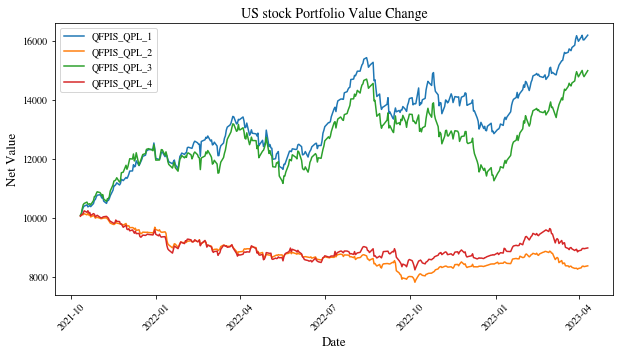

In [15]:
# 设置图形大小
plt.figure(figsize=(10, 5))

for i in range(len(QPL)):
    
    
    res_df = pd.read_csv(f'backtest_result/{model_list[-1]}_{QPL[i]}_{market_list[2]}_results.csv')
    CR = res_df.loc[res_df['metric'] == 'CR', 'value'].values
    CR = CR[0].replace('\n', '').strip('[]')
    floats = [float(x) for x in CR.split()]
    cr_arr = np.array(floats, dtype=float)

    # 创建一个新的DataFrame，包含日期和净值序列
    data = pd.DataFrame({'Date': last_20_percent_dates[:-3], 'Net_Value': cr_arr})

    # 将日期列转换为datetime类型
    data['Date'] = pd.to_datetime(data['Date'])

    # 绘制净值序列图
    plt.plot(data['Date'], data['Net_Value'], label=f"{model_list[-1]}_{QPL[i]}")  # 添加标签

# 设置x轴的日期格式和间隔
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# 旋转x轴标签
plt.xticks(rotation=45)

# 设置x轴和y轴的标签
plt.xlabel('Date',fontsize=13)
plt.ylabel('Net Value',fontsize=13)

# 设置图表标题
plt.title('US stock Portfolio Value Change',fontsize=14)

# 添加图例
plt.legend()
# 显示图形
figure_name = "us_stock_backtest_QFPIS.png"
plt.savefig(os.path.join(save_path, figure_name),dpi=400,bbox_inches = 'tight')
plt.show()

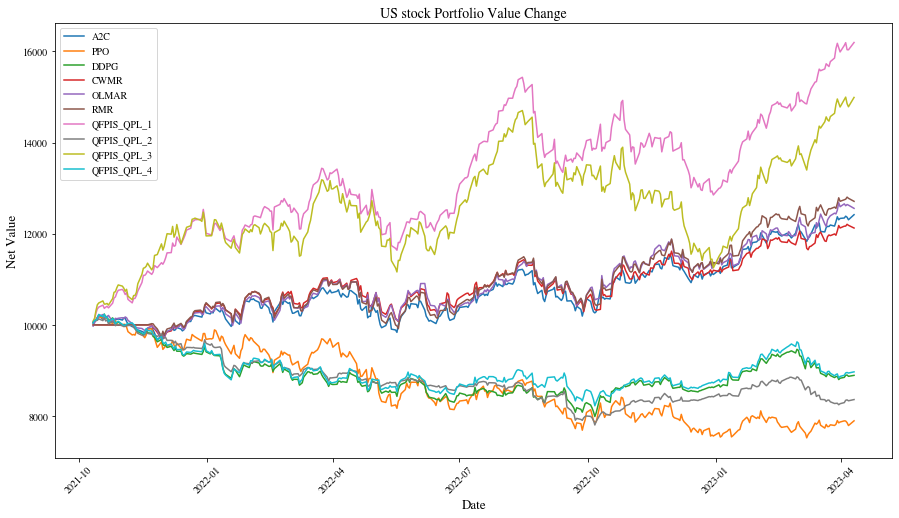

In [16]:
# 设置图形大小

model_list = ['A2C','PPO','DDPG','CWMR','OLMAR','RMR','QFPIS']
plt.figure(figsize=(15, 8))

for i in range(len(model_list)):
    
    if i == len(model_list)-1:
        for j in range(len(QPL)):
            res_df = pd.read_csv(f'backtest_result/{model_list[i]}_{QPL[j]}_{market_list[2]}_results.csv')
            CR = res_df.loc[res_df['metric'] == 'CR', 'value'].values
            CR = CR[0].replace('\n', '').strip('[]')
            floats = [float(x) for x in CR.split()]
            cr_arr = np.array(floats, dtype=float)

            # 创建一个新的DataFrame，包含日期和净值序列
            data = pd.DataFrame({'Date': last_20_percent_dates[:-3], 'Net_Value': cr_arr})

            # 将日期列转换为datetime类型
            data['Date'] = pd.to_datetime(data['Date'])

            # 绘制净值序列图
            plt.plot(data['Date'], data['Net_Value'], label=f"{model_list[-1]}_{QPL[j]}")  # 添加标签
    else:
        res_df = pd.read_csv(f'backtest_result/{model_list[i]}_{market_list[2]}_results.csv')
        CR = res_df.loc[res_df['metric'] == 'CR', 'value'].values
        CR = CR[0].replace('\n', '').strip('[]')
        floats = [float(x) for x in CR.split()]
        cr_arr = np.array(floats, dtype=float)

        # 创建一个新的DataFrame，包含日期和净值序列
        data = pd.DataFrame({'Date': last_20_percent_dates[:-3], 'Net_Value': cr_arr})

        # 将日期列转换为datetime类型
        data['Date'] = pd.to_datetime(data['Date'])

        # 绘制净值序列图
        plt.plot(data['Date'], data['Net_Value'], label=model_list[i])  # 添加标签

# 设置x轴的日期格式和间隔
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# 旋转x轴标签
plt.xticks(rotation=45)

# 设置x轴和y轴的标签
plt.xlabel('Date',fontsize=13)
plt.ylabel('Net Value',fontsize=13)

# 设置图表标题
plt.title('US stock Portfolio Value Change',fontsize=14)

# 添加图例
plt.legend(loc="upper left")
# 显示图形
figure_name = "us_stock_backtest_all.png"
plt.savefig(os.path.join(save_path, figure_name),dpi=400,bbox_inches = 'tight')
plt.show()